In [6]:
library(forecast)

In [7]:
training_dataset = read.csv("../../dengueData/Iquitos/iquitos_training_data.csv")
training_dataset

season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases
2000/2001,1,2000-07-01,0,0,0,0,0,0
2000/2001,2,2000-07-08,0,0,0,0,0,0
2000/2001,3,2000-07-15,0,0,0,0,0,0
2000/2001,4,2000-07-22,0,0,0,0,0,0
2000/2001,5,2000-07-29,0,0,0,0,0,0
2000/2001,6,2000-08-05,0,0,0,0,0,0
2000/2001,7,2000-08-12,0,0,0,0,0,0
2000/2001,8,2000-08-19,0,0,0,0,0,0
2000/2001,9,2000-08-26,0,0,0,0,0,0
2000/2001,10,2000-09-02,0,0,0,0,0,0


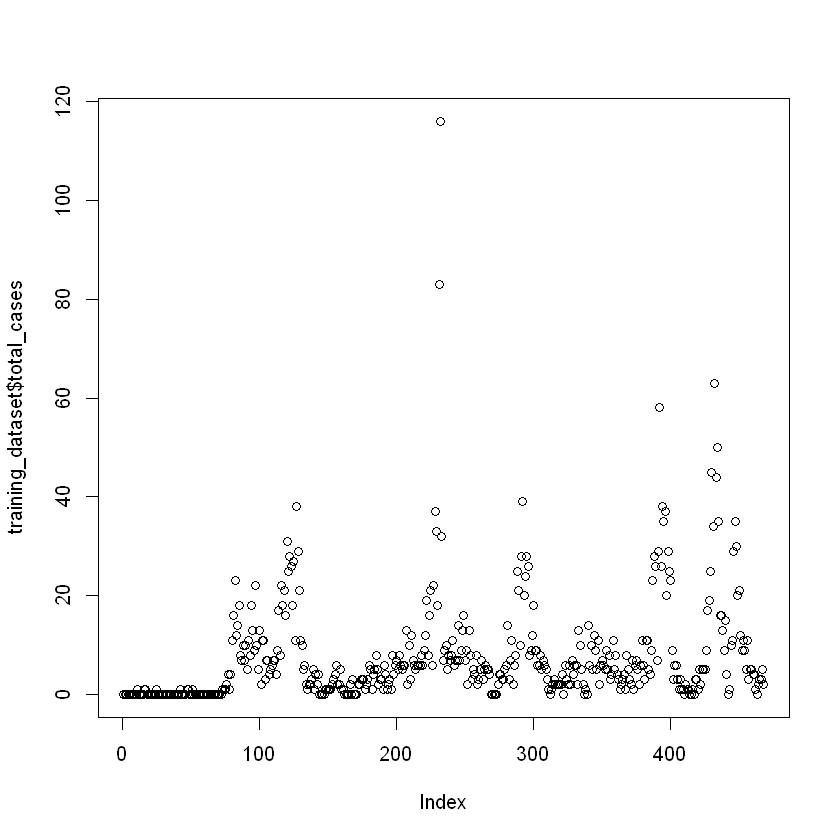

In [8]:
plot(training_dataset$total_cases)

In [9]:
testing_dataset = read.csv("../../dengueData/Iquitos/iquitos_testing_data.csv")
testing_length = nrow(testing_dataset)
testing_length

[1] 676

In [10]:
split_index = nrow(training_dataset)
window_size = 4
lag_weeks = 1
train = testing_dataset$total_cases[1:(split_index - lag_weeks + 1)]
test = testing_dataset$total_cases[(split_index+1):(nrow(testing_dataset))]

length(train)
length(test)

[1] 468

[1] 208

In [16]:
endIndex = length(test)
trainIndex = length(train)

predictions = numeric(0)
for (index in 1:endIndex){
    fit <- auto.arima(testing_dataset$total_cases[1:trainIndex+index-1], seasonal=TRUE)
    print(arimaorder(fit))
    fcast <- forecast(fit, h=1)
    forecasted_data <- data.frame(fcast)
    predictions[index] <- forecasted_data$Point.Forecast[1]
}

p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
3 1 0 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 
1 0 4 
p d q 

In [17]:
length(predictions)

[1] 208

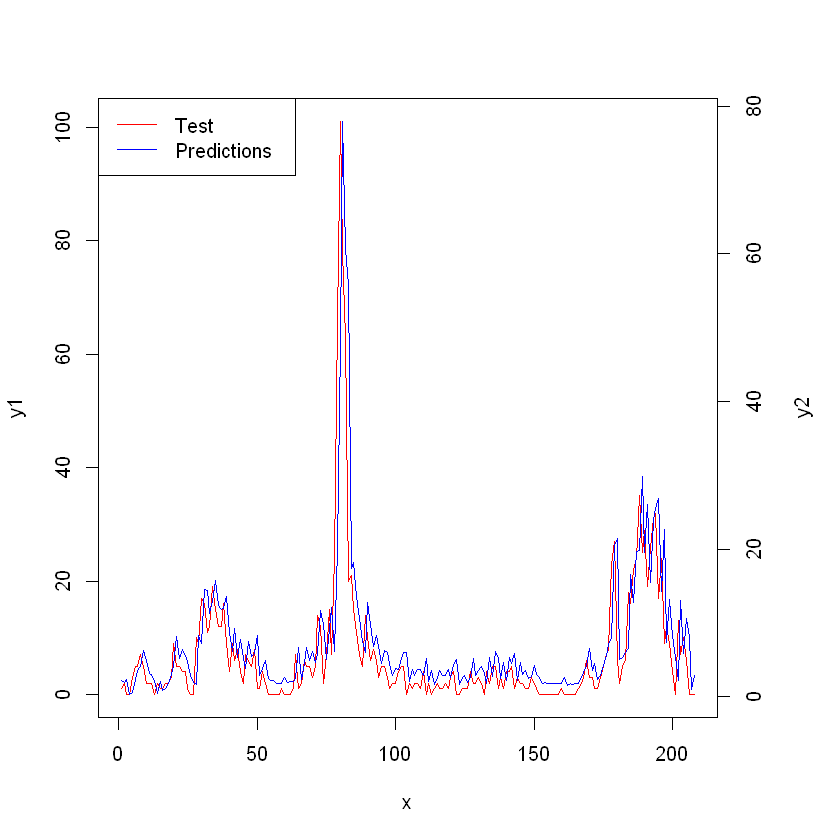

In [18]:

x <- 1:endIndex
y1 <- test
y2 <- predictions
par(mar=c(5,4,4,5)+.1)
plot(x,y1,type="l",col="red")
par(new=TRUE)
plot(x, y2,,type="l",col="blue",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("y2",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Test","Predictions"))

In [19]:
library(MLmetrics)
mse = MSE(predictions, test)
mse

[1] 47.96451